<a href="https://colab.research.google.com/github/1o-o1/Smart-Contract/blob/main/Copy_of_Process_Smart_(first).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import time
import os
import sklearn.metrics as m
from glob import glob
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Research/Smart Contract
%ls

Mounted at /content/drive
/content/drive/MyDrive/Research/Smart Contract
'=3.1'                     Dataset.zip
 ANN0_acc.png              Docs/
 ANN0_loss.png            'elicit-results (1).csv'
 ANN0.png                  Ethereum_smart_contract_datast.zip
 ANN0result.csv            filenames2.csv
 ANN0result.gsheet         filenames.csv
 bytecode@                 FirstRunMLresult.csv
 CNN0_acc.png              FirstRun-Test-result.csv
 CNN0_loss.png             FirstRun-Train-result.csv
 CNN0.png                  FirstRun-Train-result.gsheet
 CNN0result.csv            input2.csv
 CNN1_acc.png              input.csv
 CNN1_loss.png             Label2.csv
 CNN1.png                  Label.csv
 CNN1result.csv           'Process Smart.ipynb'
 dataset/                 'Process XAI.ipynb'
'Dataset 12K Eth 8 vol'/  'smart contract dataset.ipynb'
 Dataset2/                'Smart Contract.ipynb'
 datasetbyte/             'Smart Contract Lit.gsheet'
'Dataset list.gsheet'      tokenizer2.pickle
 

In [ ]:
df=pd.read_csv("datasetx2.csv")
label=pd.read_csv("datasety2.csv")
files=pd.read_csv("filenames2.csv")

In [ ]:
label=np.array(label)

In [ ]:
df=df.replace(-1,1027)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2720,2721,2722,2723,2724,2725,2726,2727,2728,2729
0,22.0,23.0,30.0,23.0,30.0,946.0,946.0,946.0,946.0,2.0,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0
1,34.0,36.0,36.0,36.0,4.0,23.0,4.0,6.0,7.0,39.0,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0
2,39.0,200.0,200.0,200.0,200.0,200.0,40.0,108.0,250.0,250.0,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0
3,513.0,513.0,513.0,900.0,972.0,947.0,972.0,972.0,947.0,619.0,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0
4,150.0,7.0,491.0,5.0,491.0,5.0,491.0,5.0,1.0,2.0,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0


In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2, mutual_info_classif
transformer = GenericUnivariateSelect(mutual_info_classif, mode='k_best', param=256)
X_new = transformer.fit_transform(df, label)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_new.shape

(10320, 256)

In [ ]:
pd.DataFrame(X_new).head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,22.0,23.0,30.0,23.0,30.0,946.0,946.0,946.0,946.0,2.0,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0
1,34.0,36.0,36.0,36.0,4.0,23.0,4.0,6.0,7.0,39.0,...,40.0,40.0,39.0,40.0,23.0,22.0,693.0,693.0,22.0,23.0
2,39.0,200.0,200.0,200.0,200.0,200.0,40.0,108.0,250.0,250.0,...,32.0,34.0,32.0,34.0,39.0,39.0,2.0,2.0,40.0,40.0
3,513.0,513.0,513.0,900.0,972.0,947.0,972.0,972.0,947.0,619.0,...,9.0,867.0,867.0,867.0,9.0,8.0,9.0,873.0,873.0,8.0
4,150.0,7.0,491.0,5.0,491.0,5.0,491.0,5.0,1.0,2.0,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0


NGRAM is not required

In [ ]:
import re
from nltk.util import ngrams

#tokens = [token for token in s if token != -1]
#output = list(ngrams(tokens, 2))

In [ ]:
output = list(ngrams(X_new, 2))
output = np.array(output)
output.shape

(10319, 2, 256)

In [ ]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,897.0,897.0,4.0,6.0,4.0,897.0,4.0,21.0,21.0,7.0,...,22.0,23.0,30.0,23.0,30.0,23.0,3.0,1.0,1.0,2.0
1,30.0,30.0,33.0,33.0,33.0,34.0,33.0,30.0,30.0,23.0,...,23.0,22.0,21.0,19.0,21.0,40.0,44.0,49.0,212.0,281.0
2,34.0,23.0,22.0,21.0,40.0,39.0,40.0,39.0,7.0,472.0,...,715.0,14.0,15.0,25.0,25.0,9.0,25.0,254.0,254.0,964.0
3,836.0,8.0,11.0,910.0,910.0,910.0,910.0,963.0,963.0,963.0,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0
4,4.0,4.0,6.0,4.0,3.0,3.0,4.0,4.0,2.0,1.0,...,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0,1027.0


In [ ]:
x= np.reshape(output,(10319,512))

Run from here

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = TfidfTransformer()
out = vectorizer.fit_transform(X_new)
#vectorizer.get_feature_names_out()

print(out.shape)

(10320, 256)


In [ ]:
Xall=out.toarray()

In [ ]:
Xall.shape

(10320, 256)

In [ ]:
label.shape

(10320, 1)

In [ ]:
label.shape

(10320, 1)

In [ ]:
#yall=np.reshape(label,(10320))
#yall=yall[:10319]
label.shape

(10320, 1)

In [ ]:
pd.DataFrame(Xall).to_csv('XProcessed.csv',index=False)
pd.DataFrame(label).to_csv('yProcessed.csv',index=False)

In [ ]:
y=pd.DataFrame(label)
y.value_counts()

0    2802
1    2688
2    1680
3    1074
4     720
5     600
6     378
7     378
dtype: int64

### **ML From here:**

In [ ]:
Xall=pd.read_csv("XProcessed.csv")
yall=pd.read_csv("yProcessed.csv")

In [ ]:
pd.DataFrame(Xall).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,10319.0,0.016201,0.021610,0.000044,0.000642,0.004803,0.026444,0.111254
1,10319.0,0.018884,0.025213,0.000044,0.000741,0.005466,0.032008,0.120820
2,10319.0,0.016516,0.022721,0.000044,0.000627,0.004513,0.025536,0.119334
3,10319.0,0.017727,0.024956,0.000046,0.000630,0.004228,0.027758,0.173093
4,10319.0,0.017226,0.023984,0.000044,0.000716,0.004928,0.026802,0.155230
...,...,...,...,...,...,...,...,...
507,10319.0,0.053305,0.034614,0.000078,0.026576,0.056264,0.072668,0.295260
508,10319.0,0.051782,0.035683,0.000076,0.017805,0.055317,0.070713,0.303580
509,10319.0,0.052175,0.035624,0.000056,0.018894,0.055317,0.071193,0.303580
510,10319.0,0.053539,0.035205,0.000057,0.026416,0.056365,0.073064,0.303580


In [ ]:
plt.figure(figsize=(10,8))
plt.title('Correlation with output')
df.corr('spearman')[yall].sort_values(ascending=False)[1:].plot(kind='bar')
plt.savefig('Attention_cor_out.png')
plt.show()

In [ ]:
Xall=np.array(Xall)
yall=np.array(yall)
yall=yall.flatten()
print(Xall.shape)
print(yall.shape)

(10319, 512)
(10319,)


In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(Xall,yall,train_size=0.75, random_state=7)
print(X_train.shape)
print(Y_train.shape)

(7739, 512)
(7739,)


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import BernoulliRBM

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import NearestCentroid

from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC, LinearSVC, SVR
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
#Linear
LR_Classifier = LogisticRegression(class_weight='balanced')
LR_Classifier.fit(X_train,Y_train)

LnR_Classifier = LinearRegression()
LnR_Classifier.fit(X_train, Y_train)

SGD_Classifier = SGDClassifier()
SGD_Classifier.fit(X_train, Y_train)

Ridg_Classifier =  RidgeClassifier()
Ridg_Classifier.fit(X_train, Y_train)

PasA_Classifier = PassiveAggressiveClassifier()
PasA_Classifier.fit(X_train, Y_train)

#Tree
DT_Classifier = DecisionTreeClassifier()
DT_Classifier.fit(X_train, Y_train)

#Neighbours

KNN_Classifier= KNeighborsClassifier(n_neighbors=3)
KNN_Classifier.fit(X_train, Y_train)


RNei_Classifier=RadiusNeighborsClassifier()
RNei_Classifier.fit(X_train, Y_train)

NearC_Classifier=NearestCentroid()
NearC_Classifier.fit(X_train, Y_train)


#Ensemble
RF_Classifier = RandomForestClassifier(max_depth=10)
RF_Classifier.fit(X_train, Y_train)

AdaB_Classifier = AdaBoostClassifier()
AdaB_Classifier.fit(X_train, Y_train)

#GradB_Classifier = GradientBoostingClassifier()
#GradB_Classifier.fit(X_train, Y_train)

XGB_Classifier = XGBClassifier(random_state=3, learning_rate=0.05, max_depth=10, n_estimators=100)
XGB_Classifier.fit(X_train, Y_train)

HGB_Classifier =HistGradientBoostingClassifier()
HGB_Classifier.fit(X_train, Y_train)

Bag_Classifier = BaggingClassifier()
Bag_Classifier.fit(X_train, Y_train)

ET_Classifier = ExtraTreesClassifier()
ET_Classifier.fit(X_train, Y_train)


SVM_Classifier = SVC()
SVM_Classifier.fit(X_train, Y_train)
LSVM_Classifier = LinearSVC()
LSVM_Classifier.fit(X_train, Y_train)

#Naive Bayes
GNB_Classifier = GaussianNB()
GNB_Classifier.fit(X_train, Y_train)

BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

CatNB_Classifier = CategoricalNB()
CatNB_Classifier.fit(X_train, Y_train)

ComNB_Classifier =  ComplementNB()
ComNB_Classifier.fit(X_train, Y_train)

MNB_Classifier = MultinomialNB()
MNB_Classifier.fit(X_train, Y_train)

#NN
MLP_Classifier = MLPClassifier()
MLP_Classifier.fit(X_train, Y_train)
BRBM_Classifier = BernoulliRBM()
BRBM_Classifier.fit(X_train, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


BernoulliRBM()

In [ ]:
models=[]
models.append(('Logistic Regression Classifier', LR_Classifier))
models.append(('Linear Regression Classifier',LnR_Classifier))
models.append(('Stochastic Gradient  Descent',SGD_Classifier))
models.append(('Ridge Classifier', Ridg_Classifier))
models.append(('Passive Aggressive Classifier', PasA_Classifier))


models.append(('Decision Tree Classifier',DT_Classifier))
models.append(('K- Nearest Neighbor Classifier',KNN_Classifier))
models.append(('Radius Neighbor Classifier ',RNei_Classifier))
models.append(('Nearest Centroid Classifier',NearC_Classifier))


models.append(('Random Forest Classifier',RF_Classifier))
models.append(('AdaBoost Classifier',AdaB_Classifier))
#models.append(('Gradient Boosting Classifier',GradB_Classifier))
models.append(('Extreme Gradient Boosting Classifier',XGB_Classifier))
models.append(('Hist Gradient Boosting Classifier',HGB_Classifier))
models.append(('Bagging Classifier',Bag_Classifier))
models.append(('Extra Trees Classifier',ET_Classifier ))


models.append(('Support Vector Classifier',SVM_Classifier))
models.append(('Linear Support Vector Classifier',LSVM_Classifier))

models.append(('Gaussian Naive Bayes Classifier',GNB_Classifier))
models.append(('Bernoulli Naive Bayes Classifier',BNB_Classifier))
models.append(('Categorical Naive Bayes Classifier',CatNB_Classifier))
models.append(('Complement Naive Bayes Classifier',ComNB_Classifier))
models.append(('Multinomial Naive Bayes Classifier',MNB_Classifier))

models.append(('Multi-layer Perceptron classifier',MLP_Classifier))
#models.append(('Bernoulli Restricted Boltzmann Machine classifier',BRBM_Classifier))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit

In [ ]:
Name= 'FirstRun'
res=[]
output=[]
output2=[]
for i, v in models:
    row= {}

    Xpred =  v.predict(X_train)
    Xpred=np.array(Xpred,dtype=int)
    #scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, Xpred)
    confusion_matrix = metrics.confusion_matrix(Y_train, Xpred)
    classification = metrics.classification_report(Y_train, Xpred)
    #row.append(Name,i,num_feat)

    lines = classification.split('\n')
    line = lines[7:-1][0]
    row_data = line.split('      ')
    row['ML'] = i
    row ['Accuracy'] = accuracy
    #row ['CV mean'] = scores.mean()
    row ['Precision'] = float(row_data[1])
    row ['Recall'] = float(row_data[2])
    row ['F1-Score'] = float(row_data[3])
    row ['TN'] = confusion_matrix[0][0]
    row ['FP'] = confusion_matrix[0][1]
    row ['FN'] = confusion_matrix[1][0]
    row ['TP'] = confusion_matrix[1][1]
    output.append('....................... {} Model Evaluation =============================='.format(i))
    #output.append("\n\nCross Validation Mean Score: \n")
    #output.append(scores.mean())
    output.append("\n\Model Accuracy: \n")
    output.append(accuracy)
    output.append("\n\Confusion matrix: \n")
    output.append(confusion_matrix)
    output.append("\n\Classification report: \n")
    output.append(classification)

    Xpred =  v.predict(X_test)
    Xpred=np.array(Xpred,dtype=int)
    #scores = cross_val_score(v, X_test, Y_test, cv=10)
    accuracy = metrics.accuracy_score(Y_test, Xpred)
    confusion_matrix = metrics.confusion_matrix(Y_test, Xpred)
    classification = metrics.classification_report(Y_test, Xpred)
    lines = classification.split('\n')
    line = lines[7:-1][0]
    row_data = line.split('      ')
    row ['Tst Accuracy'] = accuracy
    #row ['Tst CV mean'] = scores.mean()
    row ['Tst Precision'] = float(row_data[1])
    row ['Tst Recall'] = float(row_data[2])
    row ['Tst F1-Score'] = float(row_data[3])
    row ['Tst TN'] = confusion_matrix[0][0]
    row ['Tst FP'] = confusion_matrix[0][1]
    row ['Tst FN'] = confusion_matrix[1][0]
    row ['Tst TP'] = confusion_matrix[1][1]
    output2.append('.......................{} test Model Evaluation =============================='.format(i))
    #output2.append("Cross Validation Mean Score: ")
    #output2.append(scores.mean())
    output2.append("Model Accuracy: ")
    output2.append(accuracy)
    output2.append("Confusion matrix:")
    output2.append(confusion_matrix)
    output2.append("Classification report:")
    output2.append(classification)
    res.append(row)
pd.DataFrame.from_dict(output).to_csv(Name+'-Train-result.csv',index=False)
pd.DataFrame.from_dict(output2).to_csv(Name+'-Test-result.csv',index=False)

In [ ]:
pd.DataFrame(res)

,ML,Accuracy,Precision,Recall,F1-Score,TN,FP,FN,TP,Tst Accuracy,Tst Precision,Tst Recall,Tst F1-Score,Tst TN,Tst FP,Tst FN,Tst TP
0,Logistic Regression Classifier,0.525779,5.0,0.31,0.59,1040,136,263,847,0.487984,5.0,0.26,0.54,304,62,91,269
1,Linear Regression Classifier,0.304303,4.0,0.03,0.02,0,0,40,839,0.305814,4.0,0.07,0.03,0,0,14,241
2,Stochastic Gradient Descent,0.581083,5.0,0.86,0.27,1423,196,439,1102,0.540698,5.0,0.78,0.22,407,86,155,356
3,Ridge Classifier,0.615325,5.0,0.80,0.31,1600,302,457,1387,0.556589,5.0,0.68,0.26,470,124,173,437
4,Passive Aggressive Classifier,0.669466,5.0,0.98,0.42,1075,342,45,1392,0.619767,5.0,0.96,0.33,299,126,27,432
5,Decision Tree Classifier,0.998966,5.0,1.00,1.00,2117,8,0,2002,0.998450,5.0,1.00,1.00,673,4,0,685
6,K- Nearest Neighbor Classifier,0.998320,5.0,1.00,1.00,2122,1,10,1992,0.991085,5.0,0.94,1.00,662,5,8,677
7,Radius Neighbor Classifier,0.330663,5.0,1.00,0.04,2023,49,1556,400,0.319767,5.0,1.00,0.03,641,17,538,134
8,Nearest Centroid Classifier,0.383512,5.0,0.18,0.30,1042,84,553,499,0.358915,5.0,0.16,0.27,320,42,197,167
9,Random Forest Classifier,0.990438,5.0,1.00,0.97,2109,12,0,2002,0.986822,5.0,1.00,0.97,669,6,0,685


In [ ]:
pd.DataFrame.from_dict(res).to_csv(Name+'MLresult.csv',index=False)

In [ ]:
pd.DataFrame(res)

,Name,Tst Accuracy,Tst Precision,Tst Recall,Tst F1-Score,Tst TN,Tst FP,Tst FN,Tst TP
0,Logistic Regression Classifier,0.487984,5.0,0.26,0.54,304,62,91,269
1,Linear Regression Classifier,0.305814,4.0,0.07,0.03,0,0,14,241
2,Stochastic Gradient Descent,0.540698,5.0,0.78,0.22,407,86,155,356
3,Ridge Classifier,0.556589,5.0,0.68,0.26,470,124,173,437
4,Passive Aggressive Classifier,0.619767,5.0,0.96,0.33,299,126,27,432
5,Decision Tree Classifier,0.998450,5.0,1.00,1.00,673,4,0,685
6,K- Nearest Neighbor Classifier,0.991085,5.0,0.94,1.00,662,5,8,677
7,Radius Neighbor Classifier,0.319767,5.0,1.00,0.03,641,17,538,134
8,Nearest Centroid Classifier,0.358915,5.0,0.16,0.27,320,42,197,167
9,Random Forest Classifier,0.986822,5.0,1.00,0.97,669,6,0,685


In [ ]:
import tensorflow as tf # Imports tensorflow
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D,LSTM,Bidirectional,Attention,Concatenate,Conv1D
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

In [ ]:
yall=to_categorical(yall)
yall.shape

(10319, 8)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(Xall,yall,train_size=0.75, random_state=7)
print(X_train.shape)
print(Y_train.shape)

(7739, 512)
(7739, 8)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 1024)              263168    
                                                                 
 batch_normalization_4 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 1024)             

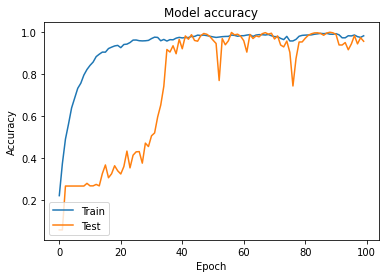

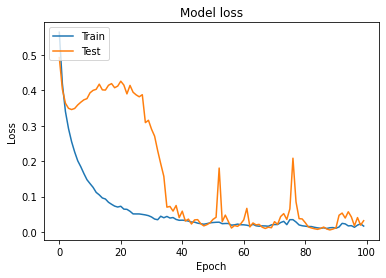

In [ ]:

name="ANN0"
model = Sequential()
model.add(Dense(256,activation="relu",input_dim=512))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.3))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(8,activation="sigmoid"))
print(model.summary())
plot_model(model, to_file=name+'.png',show_shapes= True , show_layer_names=True)

model.compile(loss = 'categorical_crossentropy',
                optimizer='adam',
                metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])

history = model.fit(X_train, Y_train,
          batch_size=512,
          epochs=100,
          validation_data=(X_test, Y_test),
          verbose=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(name+'_acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(name+'_loss.png')
plt.show()
pd.DataFrame(history.history).to_csv(name+"result.csv")

In [ ]:
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
Xall=np.reshape(Xall,(-1,256,2))
X_train,X_test,Y_train,Y_test = train_test_split(Xall,yall,train_size=0.75, random_state=7)
print(X_train.shape)
print(Y_train.shape)

(7739, 256, 2)
(7739, 8)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 254, 32)           224       
                                                                 
 conv1d_11 (Conv1D)          (None, 252, 32)           3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 126, 32)          0         
 1D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 126, 32)          128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 126, 32)           0         
                                                                 
 conv1d_12 (Conv1D)          (None, 124, 64)          

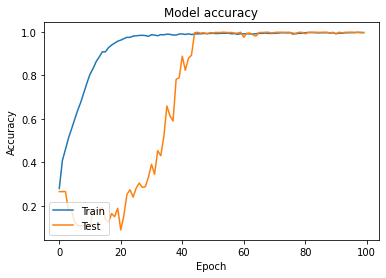

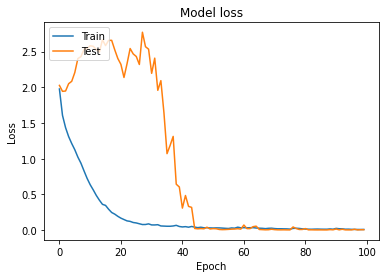

In [ ]:
name="CNN1"
model = Sequential()
model.add(Conv1D(32,3,activation="relu",input_shape=(256,2)))
model.add(Conv1D(32,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
model.add(Conv1D(64,3,activation="relu"))
model.add(Conv1D(64,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.3))
model.add(Conv1D(64,3,activation="relu"))
model.add(Conv1D(64,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.3))
model.add(Dense(64,activation="sigmoid"))
model.add(Dense(8,activation="sigmoid"))
print(model.summary())
plot_model(model, to_file=name+'.png',show_shapes= True , show_layer_names=True)

model.compile(loss = 'categorical_crossentropy',
                optimizer='adam',
                metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])

history = model.fit(X_train, Y_train,
          batch_size=512,
          epochs=100,
          validation_data=(X_test, Y_test),
          verbose=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(name+'_acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(name+'_loss.png')
plt.show()
pd.DataFrame(history.history).to_csv(name+"result.csv")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 254, 32)           224       
                                                                 
 conv1d_7 (Conv1D)           (None, 252, 32)           3104      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 126, 32)          0         
 1D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 126, 32)          128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 126, 32)           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 124, 64)          

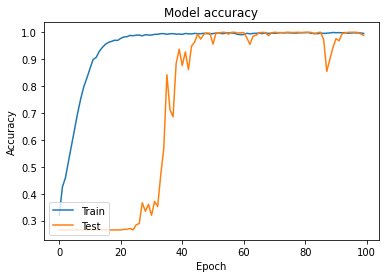

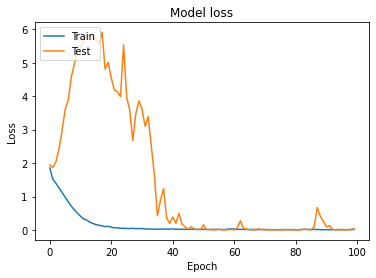

In [ ]:
name="CNN1"
model = Sequential()
model.add(Conv1D(32,3,activation="relu",input_shape=(256,2)))
model.add(Conv1D(32,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
model.add(Conv1D(64,3,activation="relu"))
model.add(Conv1D(64,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.3))
model.add(Conv1D(128,3,activation="relu"))
model.add(Conv1D(128,3,activation="relu"))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(Dense(8,activation="sigmoid"))
print(model.summary())
plot_model(model, to_file=name+'.png',show_shapes= True , show_layer_names=True)

model.compile(loss = 'categorical_crossentropy',
                optimizer='adam',
                metrics=['acc',Recall(),Precision(),AUC(),TruePositives(),TrueNegatives(),FalseNegatives(),FalsePositives()])

history = model.fit(X_train, Y_train,
          batch_size=512,
          epochs=100,
          validation_data=(X_test, Y_test),
          verbose=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')
plt.savefig(name+'_acc.png')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig(name+'_loss.png')
plt.show()
pd.DataFrame(history.history).to_csv(name+"result.csv")

In [ ]:
np.count_nonzero(yall[:,0])

2802

In [ ]:
np.count_nonzero(yall[:,1])

2687

In [ ]:
np.count_nonzero(yall[:,2])

1680

In [ ]:
np.count_nonzero(yall[:,3])

1074

In [ ]:
np.count_nonzero(yall[:,4])

720

In [ ]:
np.count_nonzero(yall[:,5])

600

In [ ]:
np.count_nonzero(yall[:,6])

378

In [ ]:
np.count_nonzero(yall[:,7])

378

In [ ]:
img1[100][100] label C
color Feature = 10-20 -> ML
img11[50][50] -> Hog -> F1[10]
img12[50][50] -> Hog -> F2[10]
img13[50][50] -> Hog -> F3[10]
img14[50][50] -> Hog -> F4[10]

F[40]= F1+ F2 + F3 + F4

trai

In [ ]:
import pickle
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
tok=[]
tok.append([23])

In [ ]:
output=tokenizer.sequences_to_texts(tok)

In [ ]:
output

['a4-ae']